In [1]:
# Read Fashion MNIST dataset
import util_mnist_reader
X_train, y_train = util_mnist_reader.load_mnist('fashion', kind='train')
X_test, y_test = util_mnist_reader.load_mnist('fashion', kind='t10k')
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Your code goes here . . .

In [2]:
import tensorflow 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np 
import matplotlib.pyplot as plt 

C:\Users\aksha\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
print("train_images:", X_train.shape)
print("test_images:", X_test.shape)

train_images: (60000, 784)
test_images: (10000, 784)


In [4]:
#Normalizing the data
X_train = X_train / 255.0
X_test = X_test / 255.0

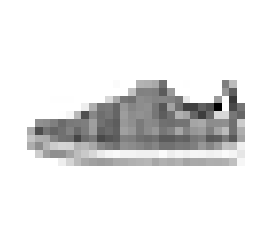

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Epoch 0 cost:  13.159239242285748
Epoch 100 cost:  0.9503433919989206
Epoch 200 cost:  0.7931400877191037
Epoch 300 cost:  0.72350710609826
Epoch 400 cost:  0.6796576585701475
Epoch 500 cost:  0.6494874073418869
Epoch 600 cost:  0.6270830841516136
Epoch 700 cost:  0.6092004294837284
Epoch 800 cost:  0.5943162056697716
Epoch 900 cost:  0.5816640125953473
Final cost: 0.5707980638742212


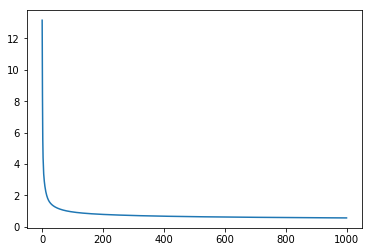

[[763   8  24  49   1   1 188   0   3   2]
 [  3 925   3  16   3   0   2   0   1   0]
 [ 28  15 660  17 136   0 158   0  15   1]
 [ 64  35  11 821  37   3  37   0   6   1]
 [ 12   8 163  46 703   0 160   0  10   0]
 [  1   0   0   1   0 841   3  56  11  24]
 [108   8 124  38 111   1 420   0  26   2]
 [  1   0   0   0   0  86   1 857  12  52]
 [ 20   1  14  12   8  20  31   5 914   3]
 [  0   0   1   0   1  48   0  82   2 915]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.75      1039
           1       0.93      0.97      0.95       953
           2       0.66      0.64      0.65      1030
           3       0.82      0.81      0.81      1015
           4       0.70      0.64      0.67      1102
           5       0.84      0.90      0.87       937
           6       0.42      0.50      0.46       838
           7       0.86      0.85      0.85      1009
           8       0.91      0.89      0.90      1028
           9       0.92     

In [6]:
#Train using Neural Network with One Hidden Layer
from sklearn.datasets import fetch_openml
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True)
X = X / 255
digits = 10
examples = y.shape[0]
y = y.reshape(1, examples)
Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)
m = 60000
m_test = X.shape[0] - m
X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]
shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]
i = 12
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(Y_train[:,i])
def compute_multiclass_loss(Y, Y_hat):
    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum
    return L
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s
n_x = X_train.shape[0]
n_h = 64
learning_rate = 0.5
Weight1 = np.random.randn(n_h, n_x)
bias1 = np.zeros((n_h, 1))
Weight2 = np.random.randn(digits, n_h)
bias2 = np.zeros((digits, 1))
X = X_train
Y = Y_train
losstrack = list()
for i in range(1000):
    Z1 = np.matmul(Weight1,X) + bias1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(Weight2,A1) + bias2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)
    cost = compute_multiclass_loss(Y, A2)
    losstrack.append(np.squeeze(cost))
    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.matmul(Weight2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)
    Weight2 = Weight2 - learning_rate * dW2
    bias2 = bias2 - learning_rate * db2
    Weight1 = Weight1 - learning_rate * dW1
    bias1 = bias1 - learning_rate * db1
    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)
print("Final cost:", cost)
plt.plot(losstrack)
plt.show()
Z1 = np.matmul(Weight1, X_test) + bias1
A1 = sigmoid(Z1)
Z2 = np.matmul(Weight2, A1) + bias2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)
predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)
predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)
print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))


In [7]:
import tensorflow as tf
import keras

In [8]:
import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [9]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [10]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [11]:
#Train using Multi-layer Neural network

model= keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0,2),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0,2),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
history=model.fit(x_train, y_train, epochs=20)
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Model multiple layers - test loss:", test_loss * 100)
print("Model multiple layers - test accuracy:", test_acc * 100)


Epoch 1/20
60000/60000 [==============================] - 27s 457us/step - loss: 0.4628 - accuracy: 0.8322
Epoch 2/20
60000/60000 [==============================] - 27s 454us/step - loss: 0.3548 - accuracy: 0.8709
Epoch 3/20
60000/60000 [==============================] - 28s 462us/step - loss: 0.3175 - accuracy: 0.8823A: 0s - loss: 0.317
Epoch 4/20
60000/60000 [==============================] - 27s 455us/step - loss: 0.2956 - accuracy: 0.8892
Epoch 5/20
60000/60000 [==============================] - 27s 456us/step - loss: 0.2778 - accuracy: 0.8961
Epoch 6/20
60000/60000 [==============================] - 27s 451us/step - loss: 0.2619 - accuracy: 0.9013
Epoch 7/20
60000/60000 [==============================] - 27s 451us/step - loss: 0.2490 - accuracy: 0.9059
Epoch 8/20
60000/60000 [==============================] - 28s 459us/step - loss: 0.2366 - accuracy: 0.9099
Epoch 9/20
60000/60000 [==============================] - 27s 458us/step - loss: 0.2302 - accuracy: 0.9127
Epoch 10/20
60000/

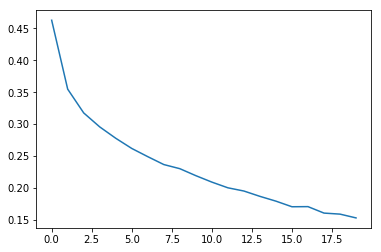

In [13]:
plt.plot(history.history['loss'])

In [14]:
test_predictions = model.predict_classes(x_test)

In [15]:
confusionmatrix = confusion_matrix(y_true = y_test, y_pred = test_predictions)
print(confusionmatrix)

[[856   0  23  21   3   2  87   0   8   0]
 [  5 975   5   9   3   0   2   0   1   0]
 [ 15   1 831  12  92   0  48   0   1   0]
 [ 24   4  12 910  24   0  20   0   6   0]
 [  0   0  85  41 820   0  53   0   1   0]
 [  0   0   0   1   0 953   0  30   1  15]
 [126   0  71  26  66   0 701   0  10   0]
 [  0   0   0   0   0   3   0 973   0  24]
 [  5   0   1   6   1   2   5   5 975   0]
 [  0   0   0   0   0   6   1  27   0 966]]


In [16]:
print(classification_report(y_true = y_test, y_pred = test_predictions))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.83      0.82      1000
           3       0.89      0.91      0.90      1000
           4       0.81      0.82      0.82      1000
           5       0.99      0.95      0.97      1000
           6       0.76      0.70      0.73      1000
           7       0.94      0.97      0.96      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



Epoch 1/20
60000/60000 [==============================] - 70s 1ms/step - loss: 0.4661 - accuracy: 0.8313
Epoch 2/20
60000/60000 [==============================] - 69s 1ms/step - loss: 0.3144 - accuracy: 0.8872
Epoch 3/20
60000/60000 [==============================] - 72s 1ms/step - loss: 0.2762 - accuracy: 0.8982
Epoch 4/20
60000/60000 [==============================] - 71s 1ms/step - loss: 0.2489 - accuracy: 0.9095
Epoch 5/20
60000/60000 [==============================] - 71s 1ms/step - loss: 0.2259 - accuracy: 0.9182
Epoch 6/20
60000/60000 [==============================] - 71s 1ms/step - loss: 0.2092 - accuracy: 0.9237
Epoch 7/20
60000/60000 [==============================] - 70s 1ms/step - loss: 0.1956 - accuracy: 0.9273
Epoch 8/20
60000/60000 [==============================] - 70s 1ms/step - loss: 0.1828 - accuracy: 0.9320
Epoch 9/20
60000/60000 [==============================] - 75s 1ms/step - loss: 0.1710 - accuracy: 0.9369
Epoch 10/20
60000/60000 [==============================

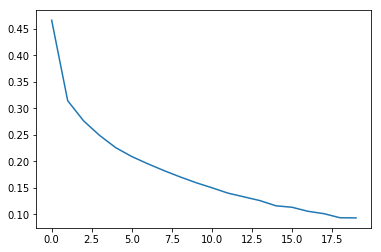

In [17]:
import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255
train_Y_new = to_categorical(train_Y)
test_Y_new = to_categorical(test_Y)
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
history = model.fit(train_X, train_Y_new, batch_size=64, epochs=20)
plt.plot(history.history['loss'])
test_loss, test_acc = model.evaluate(test_X, test_Y_new)
print('Test-loss', test_loss)
print('Test-accuracy', test_acc)
test_predictions = model.predict_classes(test_X)
from sklearn.metrics import confusion_matrix
confusionmatrix = confusion_matrix(y_true = test_Y, y_pred = test_predictions)
print(confusionmatrix)
print(classification_report(y_true = test_Y, y_pred = test_predictions))